## Análisis y Evaluación Set de Datos de características y precios de viviendas

 
 Análisis cuyo objetivo es determinar la predicción del precio de venta a casas
 

In [1]:
# Importar librerías 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Evita avisos molestos
%matplotlib inline


### Cargar Dataset y Exploración básica de los datos

In [2]:

# Carga de datos a dataframe:

df_train = pd.read_csv('train.csv')

In [3]:
df_train.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_train.index

RangeIndex(start=0, stop=1460, step=1)

In [9]:
df_train.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

### Análisis de Variable Objetivo 'SalePrice'

In [11]:

# Estadísticas descriptiva:

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

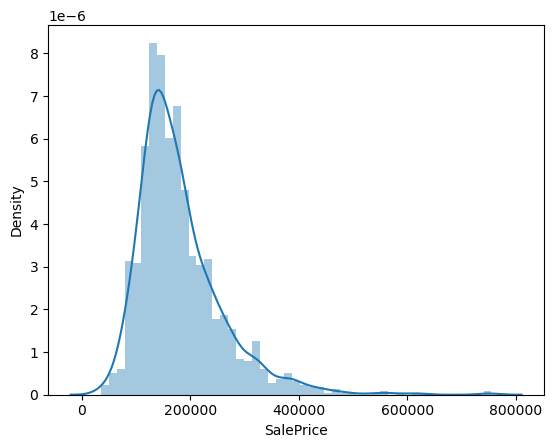

In [21]:
# Histograma:
sns.distplot(df_train['SalePrice'])

## Análisis de relación entre multivariables y variable objetivo(Precio)


Evaluando factor determinante del PRECIO de las casas en relacion de la variable 'GrLivArea'(Superficie habitable en pies cuadrados) y 'YearBuilt'(Año de 
construción)

In [12]:

df_relacion = pd.concat([df_train['SalePrice'], 
                        df_train['GrLivArea'], 
                        df_train['YearBuilt']], axis=1)
df_relacion.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000



Evaluando factor determinante del PRECIO de las casas en relacion de las variables 'YearBuilt'(Año de construción), 'TotalBsmtSF'(Superficie del sótano) y 'OverallQual'(Calidad material/acabados)

In [13]:

df_relacion1 = pd.concat([df_train['SalePrice'], 
                        df_train['YearBuilt'],
                        df_train['TotalBsmtSF'],  df_train['OverallQual']], axis=1)
df_relacion1

,SalePrice,YearBuilt,TotalBsmtSF,OverallQual
0,208500,2003,856,7
1,181500,1976,1262,6
2,223500,2001,920,7
3,140000,1915,756,7
4,250000,2000,1145,8
...,...,...,...,...
1455,175000,1999,953,6
1456,210000,1978,1542,6
1457,266500,1941,1152,7
1458,142125,1950,1078,5


### Relación de variables numéricas

Diagrama de dispersión GrlivArea/SalePrice:

In [23]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

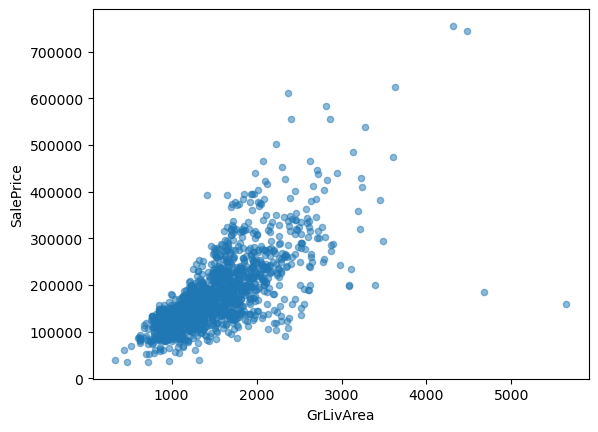

In [28]:
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha = 0.5)

Diagrama de dispersión TotalBsmtsf/SalePrice:

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

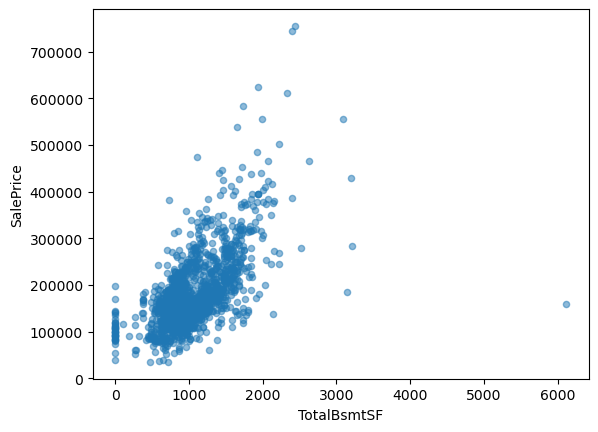

In [27]:
data2 = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data2.plot.scatter(x='TotalBsmtSF', y='SalePrice',  alpha = 0.5)

### Relación de variables categóricas

Diagrama de cajas OverAllQual/SalePrice:

(-0.5, 9.5, 0.0, 800000.0)

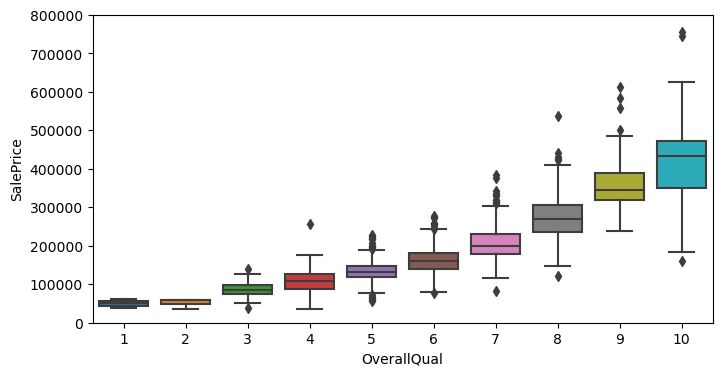

In [31]:
data3 = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8,4))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data3)
fig.axis(ymin=0, ymax=800000)

Diagrama de cajas YearBuilt/SalePrice:

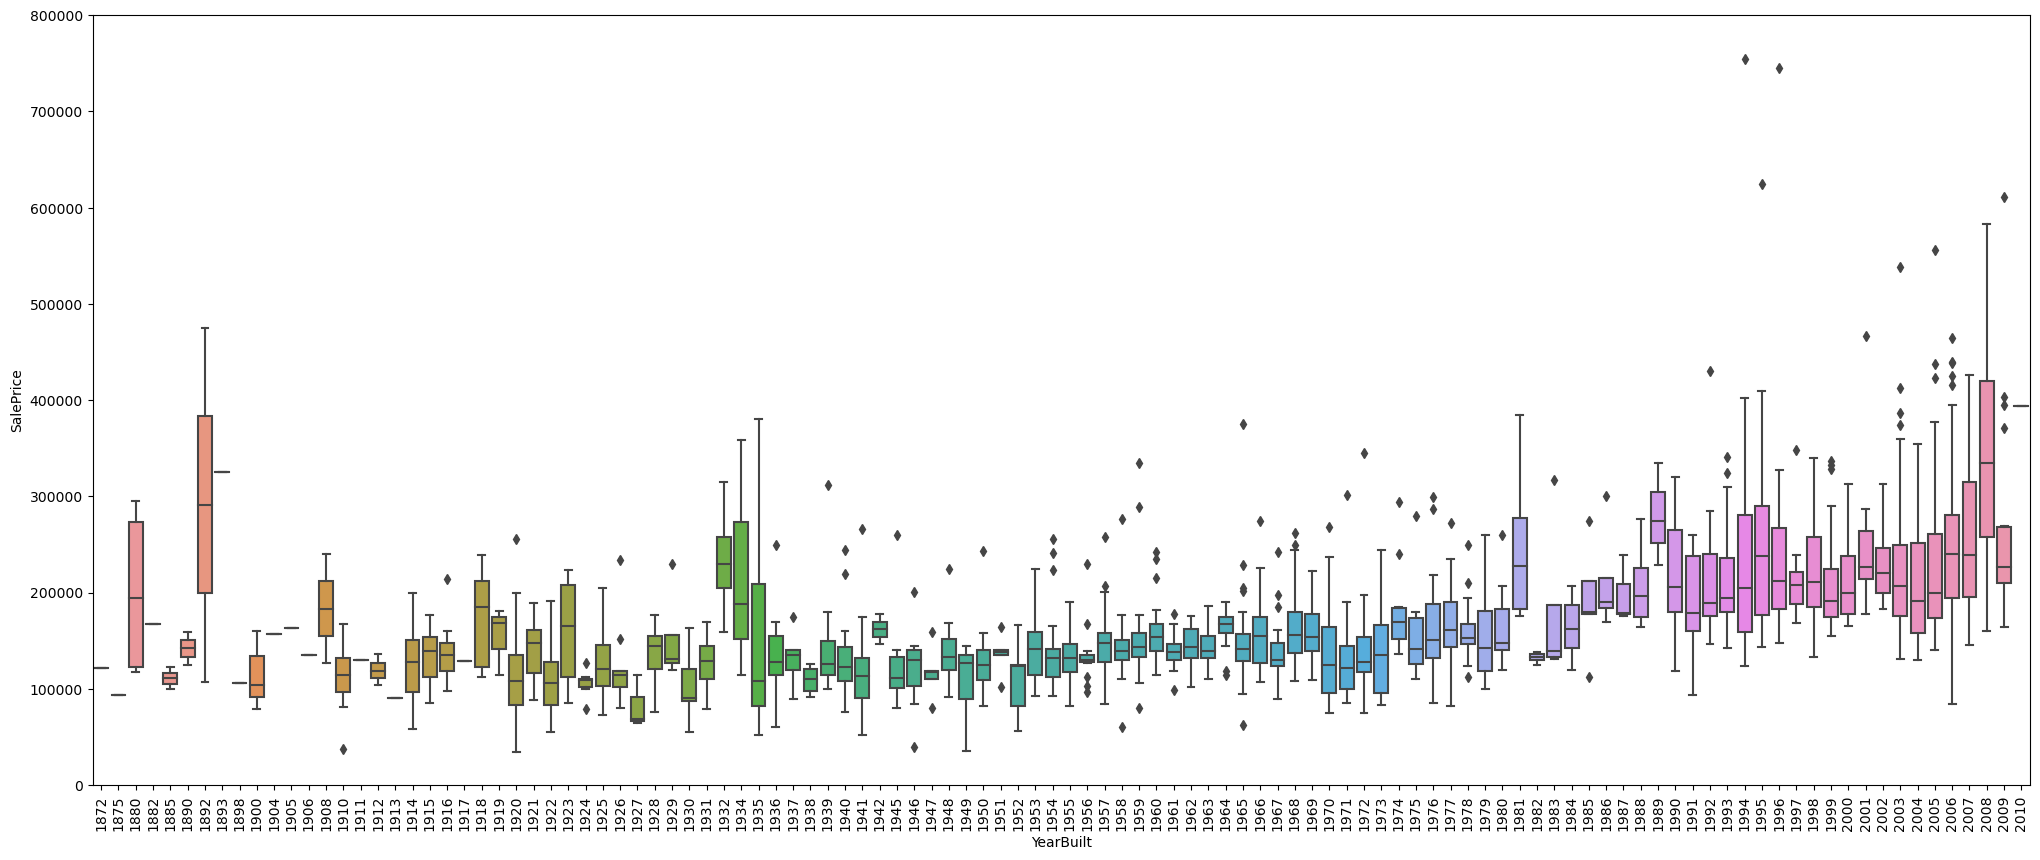

In [36]:
data4 = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(25,10))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data4)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Conclusión:

Mantienen una relación lineal positiva con 'SalePrice' las variables:'GrLivArea' y 'TotalBsmtSF', aumentando en el mismo sentido. 
La pendiente en el caso de 'TotalBsmtSF' se encuentra muy acentuada.

'OverallQual' y 'YearBuilt' también se evidencia relación con 'SalePrice', auque más notable en el primer caso.


### Pruebas de Correlación

Matriz de correlación

<Axes: >

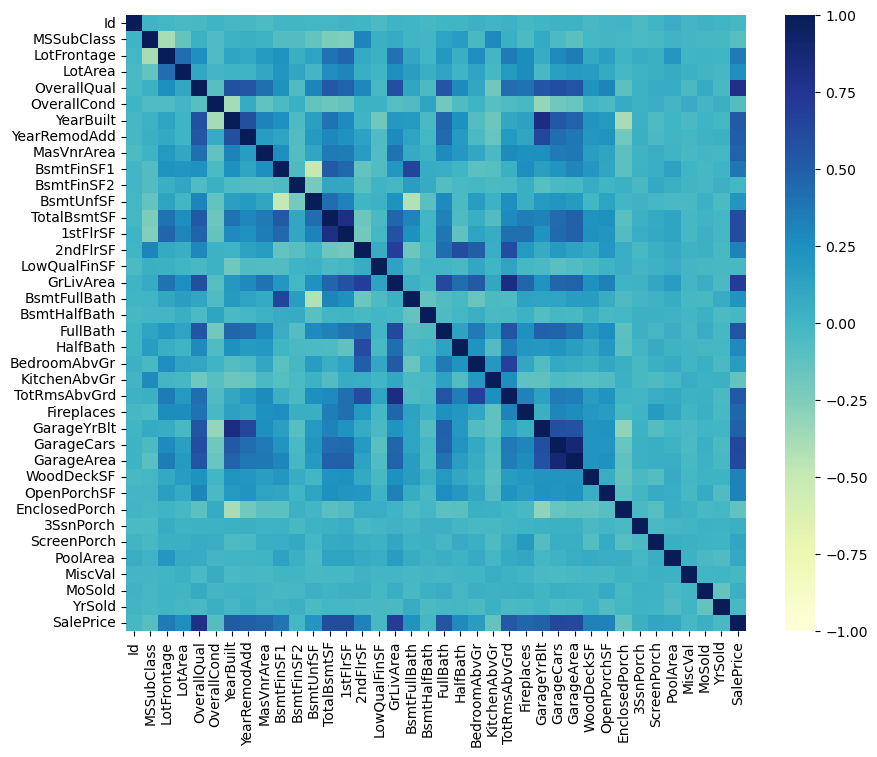

In [55]:
# Heatmap 

matcorr = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matcorr, cmap='YlGnBu', vmax=1, vmin=-1)


In [ ]:

'TotalBsmtSF' y '1stFlrSF'
'GarageX'